In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import risk_kit as rk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
ind = rk.get_ind_returns()
er = rk.annualize_ret(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

In [6]:
ind_returns = rk.get_ind_returns()
ind_nfirms = rk.get_ind_nfirms()
ind_size = rk.get_ind_size()

In [8]:
ind_returns.shape

(1110, 30)

In [9]:
ind_nfirms.shape

(1110, 30)

In [10]:
ind_size.shape

(1110, 30)

In [12]:
ind_nfirms.tail(2)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-11,55,11,3,62,21,39,29,626,66,8,...,69,434,280,36,69,95,141,61,635,128
2018-12,55,11,3,62,21,39,29,623,66,8,...,69,429,277,36,68,95,140,60,633,127


### Rolling returns and CapWeighted Index

In [13]:
ind_mktcap = ind_nfirms * ind_size
ind_mktcap.shape

(1110, 30)

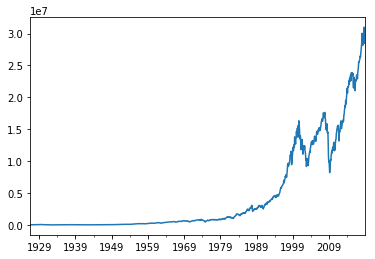

In [14]:
total_mktcap  = ind_mktcap.sum(axis='columns')
total_mktcap.plot()

In [15]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis='rows')

In [16]:
ind_capweight.head(2)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719


In [18]:
ind_capweight['1926'].sum(axis='columns')

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

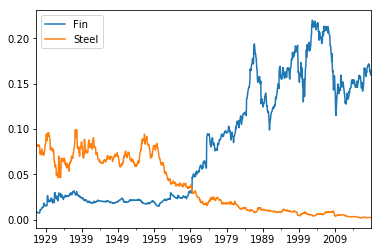

In [19]:
ind_capweight[['Fin', 'Steel']].plot()

In [21]:
total_market_return = (ind_capweight * ind_returns).sum(axis='columns')

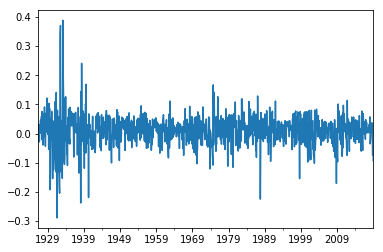

In [22]:
total_market_return.plot()

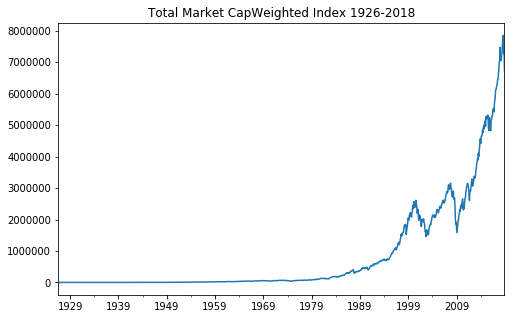

In [28]:
total_market_index = rk.compute_drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(8, 5), 
                        title="Total Market CapWeighted Index 1926-2018")

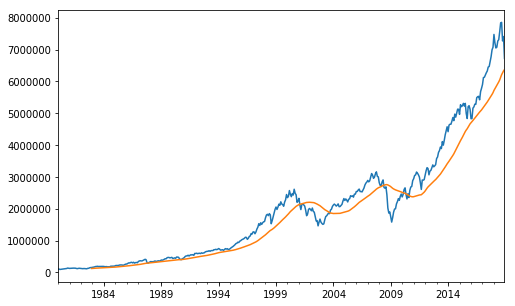

In [35]:
total_market_index['1980':].plot(figsize=(8, 5))
total_market_index['1980':].rolling(window=36).mean().plot()

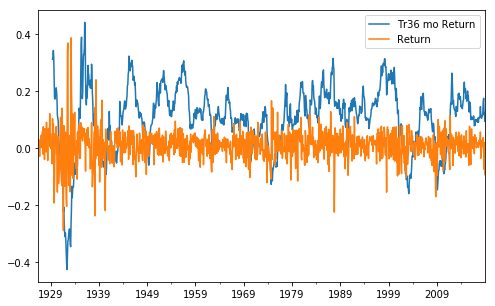

In [44]:
tmi_tr36mrets = total_market_return.rolling(window=36).aggregate(
    rk.annualize_ret, periods_per_year=12)
tmi_tr36mrets.plot(label='Tr36 mo Return', legend=True, figsize=(8,5))
total_market_return.plot(label='Return', legend=True)

### Rolling correlations and MultiIndexes and `.groupby`

In [47]:
ts_corr = ind_returns.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [52]:
ts_corr.index.names = ['date', 'industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [53]:
ind_tr36corr = ts_corr.groupby(level='date').apply(
    lambda cormat: cormat.values.mean())

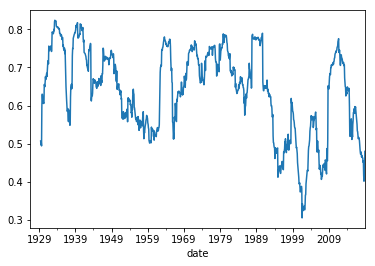

In [54]:
ind_tr36corr.plot()

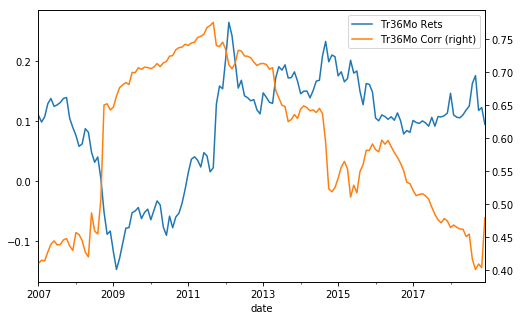

In [59]:
tmi_tr36mrets['2007':].plot(label='Tr36Mo Rets', legend=True, 
                   figsize=(8,5))
ind_tr36corr['2007':].plot(label='Tr36Mo Corr', legend=True, 
                 secondary_y=True)

In [60]:
tmi_tr36mrets.corr(ind_tr36corr)

-0.28010065062884126